Nurul Aini (060) | Arimbi Deby Setyoningrum (186)
2024A | Kelompok 15



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -R /content/drive


/content/drive:
MyDrive  Shareddrives

/content/drive/MyDrive:
'analisis kasus basis data.gdoc'
'Analisis Pola Iklim dan Pengeluaran Rumah Tangga pada 3 Kabupaten Kota    di Jawa Timur Tahun 2024 .ipynb'
'Colab Notebooks'
'Copy of Scraping Wth API nurul.ipynb'
 Data_Iklim
 IKLIM_DW
'laporan ide projek pemteks.gdoc'
'List Tugas Semester 3.gsheet'
'Salinan dari analisis kasus basis data.gdoc'

'/content/drive/MyDrive/Colab Notebooks':
'Another_copy_of_Scraping_Wth_API_nurul (1).ipynb'
'Copy of Analisis Pola Iklim dan Pengeluaran Rumah Tangga pada 3 Kabupaten Kota    di Jawa Timur Tahun 2024 .ipynb'

/content/drive/MyDrive/Data_Iklim:
Cleaned  data_gabungan_standar.xlsx  Gabungan

/content/drive/MyDrive/Data_Iklim/Cleaned:
BANYUWANGI_2024_cleaned.xlsx  SURABAYA_2024_cleaned.xlsx
MALANG_2024_cleaned.xlsx

/content/drive/MyDrive/Data_Iklim/Gabungan:
BANYUWANGI_2024_gabungan.xlsx  MALANG_2024_gabungan.xlsx
data_gabungan_standar.xlsx     SURABAYA_2024_gabungan.xlsx

/content/drive/MyDrive/IKL

In [ ]:
!rm -rf /content/drive


rm: cannot remove '/content/drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/drive/Shareddrives/Foto man Demak ku': Operation not supported
rm: cannot remove '/content/drive/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.Trash-0': Directory not empty


In [ ]:
!mkdir /content/drive


mkdir: cannot create directory ‘/content/drive’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INTEGRASI


In [ ]:
#INTEGRASI PER KOTA
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import os

root_path = "/content/drive/MyDrive/Data_Iklim/IKLIM_DW"

cities = ["SURABAYA", "MALANG", "BANYUWANGI"]

all_city_df = {}

for city in cities:
    city_path = os.path.join(root_path, city)

    if not os.path.isdir(city_path):
        print(f"Error: Directory not found for {city_path}. Skipping this city.")
        continue

    file_list = [f for f in os.listdir(city_path) if f.endswith((".xlsx", ".xls", ".csv"))]

    df_list = []

    for file_name in file_list: # Corrected: iterate over file_list, not file_path
        full_file_path = os.path.join(city_path, file_name)
        df = pd.read_excel(full_file_path)  # sesuaikan kalau CSV
        df_list.append(df)

    # gabungkan semua file bulanan
    if df_list:
        merged_df = pd.concat(df_list, ignore_index=True)

        # simpan ke dictionary
        all_city_df[city] = merged_df

        print(f"{city}: {len(merged_df)} baris berhasil digabung.")
    else:
        print(f"No valid .xlsx, .xls, or .csv files found for {city} in {city_path}. Skipping concatenation.")

Mounted at /content/drive
SURABAYA: 642 baris berhasil digabung.
MALANG: 642 baris berhasil digabung.
BANYUWANGI: 642 baris berhasil digabung.


In [ ]:
output_path = "/content/drive/MyDrive/Data_Iklim/Gabungan"

os.makedirs(output_path, exist_ok=True)

for city, df in all_city_df.items():
    df.to_excel(f"{output_path}/{city}_2024_gabungan.xlsx", index=False)


In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Gabungan/SURABAYA_2024_gabungan.xlsx")
df.head(15)


,Unnamed: 0,ID WMO,: 96933,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NAMA STASIUN,: Stasiun Meteorologi Perak I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,LINTANG,: -7.22360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,BUJUR,: 112.72390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,ELEVASI,: 3 Meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
7,01-08-2024,26.6,33,29.9,74,0,6.8,6,130,3,E
8,02-08-2024,27,33,29.2,74,0,7.9,8,90,4,E
9,03-08-2024,25.5,34.2,28.9,71,0,8,7,100,4,E


In [ ]:
df = df.rename(columns={
    "Tanggal": "date",
    "Tanggal Observasi": "date",
    "Tn": "temp_min",
    "Tx": "temp_max",
    "Tavg": "temp_avg",
    "RH_avg": "humidity",
    "RH": "humidity",
    "RR": "rainfall",
    "ss": "sunshine"
})


cleaning


In [ ]:
import pandas as pd
import os
import numpy as np

#Membersihkan data kota
# Lokasi file gabungan
input_folder = "/content/drive/MyDrive/Data_Iklim/Gabungan"
output_folder = "/content/drive/MyDrive/Data_Iklim/Cleaned"
os.makedirs(output_folder, exist_ok=True)

# List kota
cities = ["SURABAYA", "MALANG", "BANYUWANGI"]

def clean_dataset(df):
    # 1. Drop rows that are entirely empty (all NaN)
    df = df.dropna(how='all')

    header_row_index = None
    for i, row_values in df.iterrows():
        if 'TANGGAL' in row_values.astype(str).values: # Convert to string for robust search
            header_row_index = i
            break

    if header_row_index is None:
        raise ValueError("Could not find the header row containing 'TANGGAL'.")

    # 3. Select only the rows that contain the actual data, starting from *after* the header row
    df = df.iloc[header_row_index + 1:].copy()

    # 4. Reset the index, as rows have been removed
    df = df.reset_index(drop=True)

    # 5. Select the first 11 columns which contain the relevant data
    df = df.iloc[:, :11]

    # 6. Assign fixed, clean column names
    df.columns = ["TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"]

    # 7. Convert 'TANGGAL' to datetime format
    df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], format="%d-%m-%Y", errors="coerce")

    # 8. Drop any rows where 'TANGGAL' conversion failed
    df = df.dropna(subset=["TANGGAL"])

    # 9. Convert other columns to numeric, coercing errors to NaN
    numeric_cols = ["TN", "TX", "TAVG", "RH_AVG", "RR", "SS", "FF_X", "DDD_X", "FF_AVG"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # 10. Handle BMKG outlier values (8888, 9999, etc.) by replacing them with NaN
    outlier_values = [8888, 9999, 888, 999]
    df = df.replace(outlier_values, np.nan)

    return df


# LOOP UNTUK 3 FILE
for city in cities:
    file_path = f"{input_folder}/{city}_2024_gabungan.xlsx"

    print(f"Membersihkan data kota {city} ...")
    df = pd.read_excel(file_path)

    cleaned_df = clean_dataset(df)

    # Simpan file baru
    cleaned_df.to_excel(f"{output_folder}/{city}_2024_cleaned.xlsx", index=False)

print("Selesai! Semua file telah dibersihkan.")

Membersihkan data kota SURABAYA ...
Membersihkan data kota MALANG ...
Membersihkan data kota BANYUWANGI ...
Selesai! Semua file telah dibersihkan.


AGREGASI


In [ ]:
import pandas as pd
import glob
import os

# 1. BACA SEMUA FILE CLEANED PER KOTA
folder_path = "/content/drive/MyDrive/Data_Iklim/Cleaned/"  # ganti sesuai lokasi
all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

dfs = []

# mapping nama kota otomatis dari nama file
for file in all_files:
    kota = os.path.basename(file).split("_")[0].upper()   # MADIUN_2024_clean.xlsx → MADIUN

    df = pd.read_excel(file)
    df["KOTA"] = kota  # tambah kolom kota
    dfs.append(df)

# 2. STANDARDISASI NAMA KOLOM
standard_columns = {
    "TANGGAL": "tanggal",
    "TN": "t_min",
    "TX": "t_max",
    "TAVG": "t_avg",
    "RH_AVG": "rh_avg",
    "RR": "curah_hujan",
    "SS": "lama_penyinaran",
    "FF_X": "angin_max",
    "DDD_X": "arah_angin_max",
    "FF_AVG": "angin_avg",
    "DDD_CARD": "arah_angin_kar",
    "KOTA": "kota"
}

# pakai fungsi rename
dfs = [df.rename(columns=standard_columns) for df in dfs]

# 3. GABUNGKAN SEMUA DATA
df_all = pd.concat(dfs, ignore_index=True)

# 4. AGREGASI PER KOTA
agg_kota = df_all.groupby("kota").agg({
    "t_min": "mean",
    "t_max": "mean",
    "t_avg": "mean",
    "rh_avg": "mean",
    "curah_hujan": "sum",   # total hujan setahun
    "lama_penyinaran": "mean",
    "angin_max": "max",
    "angin_avg": "mean"
}).reset_index()

# 5. SIMPAN HASIL
df_all.to_excel("/content/data_gabungan_standar.xlsx", index=False)
agg_kota.to_excel("/content/rekap_agregasi_per_kota.xlsx", index=False)

print("Selesai! File gabungan & agregasi sudah dibuat.")

Selesai! File gabungan & agregasi sudah dibuat.


Data Eksplorasi


<Axes: xlabel='TANGGAL'>

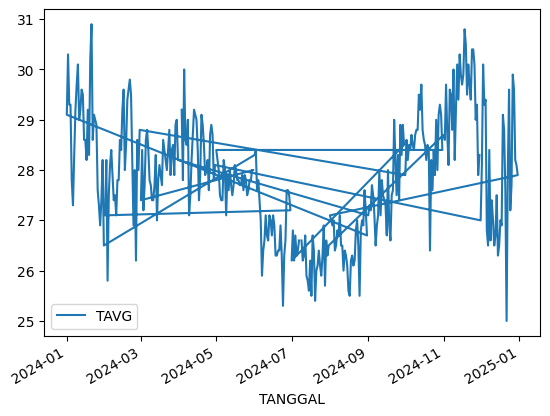

In [ ]:
#Trend suhu rata-rata di Banyuwangi
import pandas as pd

df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/BANYUWANGI_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw.plot(x="TANGGAL", y="TAVG")

In [ ]:
#Trend suhu rata-rata di Surabaya
import pandas as pd

df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/SURABAYA_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw.plot(x="TANGGAL", y="TAVG")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data_Iklim/Cleaned/SURABAYA_2024_cleaned.xlsx'

/tmp/ipython-input-3191420379.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_bw["TAVG"].resample('M').mean()


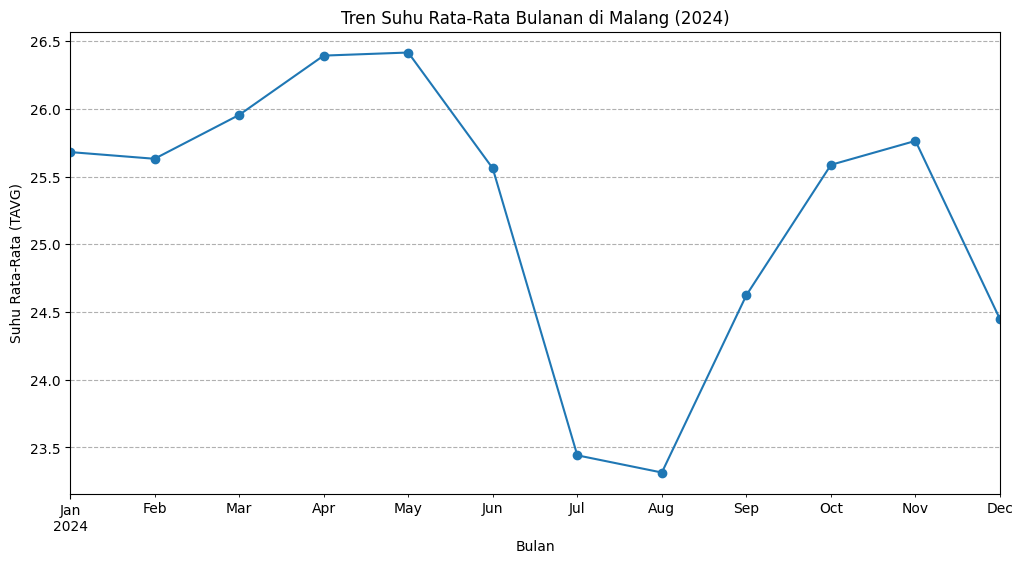

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/MALANG_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw = df_bw.set_index("TANGGAL")
df_monthly = df_bw["TAVG"].resample('M').mean()
plt.figure(figsize=(12, 6))
df_monthly.plot(kind='line', marker='o')

plt.title('Tren Suhu Rata-Rata Bulanan di Malang (2024)')
plt.xlabel('Bulan')
plt.ylabel('Suhu Rata-Rata (TAVG)')
plt.grid(axis='y', linestyle='--')
plt.show()
#

<Axes: xlabel='TANGGAL'>

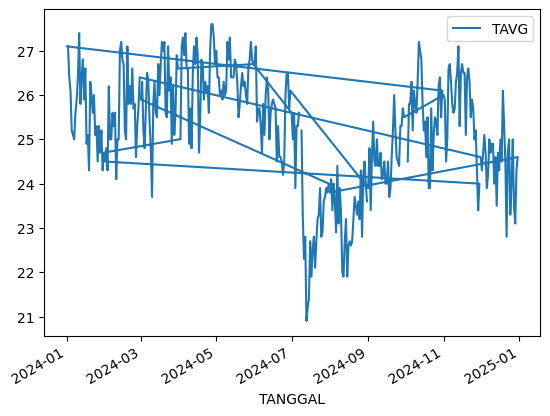

In [ ]:
#Trend suhu rata-rata di Malang
import pandas as pd

df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/MALANG_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw.plot(x="TANGGAL", y="TAVG")

In [ ]:
import pandas as pd
import os

# Path folder berisi file cleaned per kota
folder_path = "/content/drive/MyDrive/Data_Iklim/Cleaned" # Corrected folder path

# Daftar file dan nama kotanya
files = {
    "BANYUWANGI": "BANYUWANGI_2024_cleaned.xlsx",
    "MALANG": "MALANG_2024_cleaned.xlsx",
    "SURABAYA": "SURABAYA_2024_cleaned.xlsx"
}

all_data = []

for city, filename in files.items():
    file_path = os.path.join(folder_path, filename)

    # baca file excel
    df = pd.read_excel(file_path)

    # pastikan kolom tanggal dalam format datetime
    df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")

    # tambah kolom kota
    df["kota"] = city

    all_data.append(df)

# gabungkan semua kota
df_all = pd.concat(all_data, ignore_index=True)

# urutkan berdasarkan tanggal + kota
df_all = df_all.sort_values(by=["TANGGAL", "kota"])

# reset index
df_all.reset_index(drop=True, inplace=True)

# simpan hasil final
save_path = "/content/drive/MyDrive/Data_Iklim/data_gabungan_standar.xlsx"
df_all.to_excel(save_path, index=False)

save_path

'/content/drive/MyDrive/Data_Iklim/data_gabungan_standar.xlsx'

In [ ]:
#rata-rata suhu tiap kota/kabuoaten
df_all.groupby("kota")["TAVG"].mean()


,TAVG
kota,
BANYUWANGI,27.618182
MALANG,25.227824
SURABAYA,28.893994


<Axes: xlabel='TANGGAL', ylabel='TAVG'>

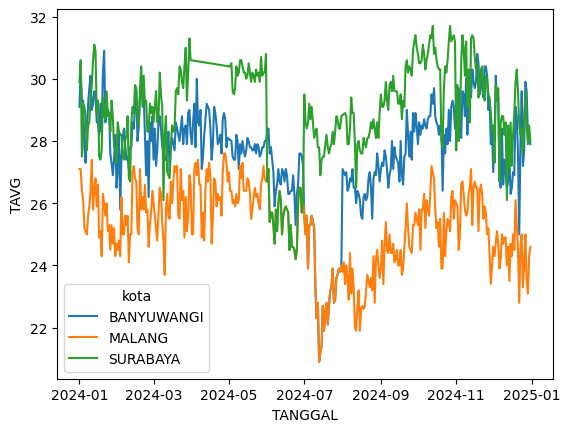

In [ ]:
import seaborn as sns
sns.lineplot(data=df_all, x="TANGGAL", y="TAVG", hue="kota")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset gabungan
file_path = "/content/drive/MyDrive/Data_Iklim/data_gabungan_standar.xlsx"
df = pd.read_excel(file_path)

# Pastikan format tanggal benar
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])

# Tambahkan kolom bulan (format: 2024-01, 2024-02, dst)
df['bulan'] = df['TANGGAL'].dt.to_period('M')


=== SUHU RATA-RATA PER KOTA (Derajat Celcius) ===
kota
SURABAYA      28.893994
BANYUWANGI    27.618182
MALANG        25.227824
Name: TAVG, dtype: float64


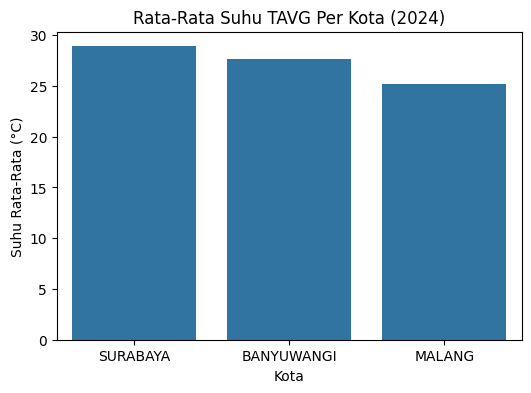

In [ ]:
# Rata-rata suhu per kota
suhu_per_kota = df.groupby("kota")["TAVG"].mean().sort_values(ascending=False)

print("=== SUHU RATA-RATA PER KOTA (Derajat Celcius) ===")
print(suhu_per_kota)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=suhu_per_kota.index, y=suhu_per_kota.values)
plt.title("Rata-Rata Suhu TAVG Per Kota (2024)")
plt.xlabel("Kota")
plt.ylabel("Suhu Rata-Rata (°C)")
plt.show()


=== TOTAL CURAH HUJAN PER KOTA (RR) ===
kota
MALANG        1970.4
BANYUWANGI    1377.2
SURABAYA      1229.8
Name: RR, dtype: float64


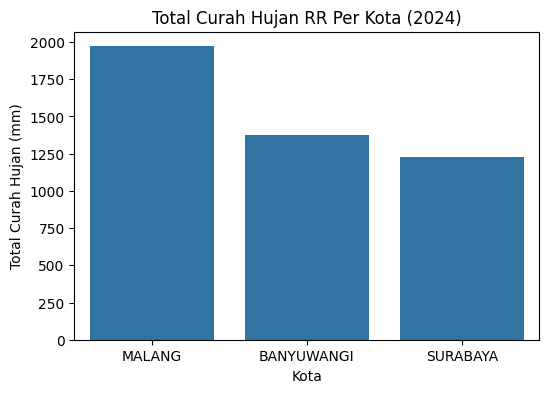

In [ ]:
# Total curah hujan per kota
hujan_per_kota = df.groupby("kota")["RR"].sum().sort_values(ascending=False)

print("=== TOTAL CURAH HUJAN PER KOTA (RR) ===")
print(hujan_per_kota)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=hujan_per_kota.index, y=hujan_per_kota.values)
plt.title("Total Curah Hujan RR Per Kota (2024)")
plt.xlabel("Kota")
plt.ylabel("Total Curah Hujan (mm)")
plt.show()


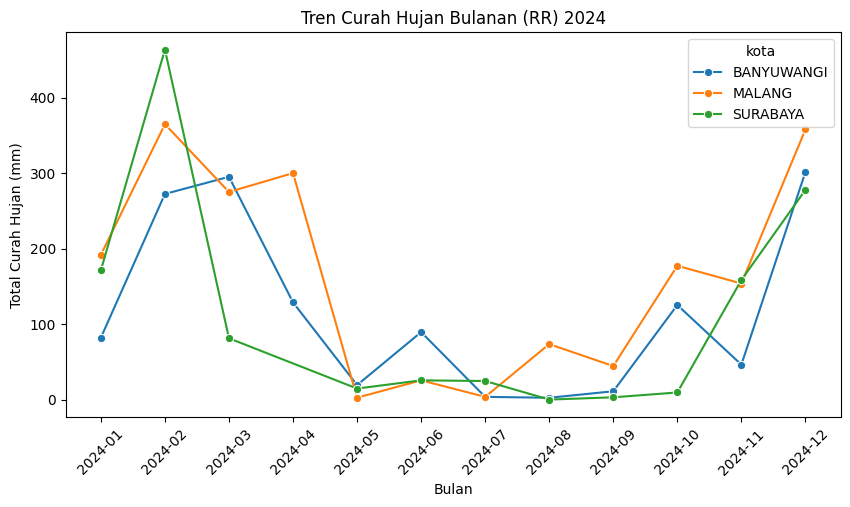

In [ ]:
# Total hujan per bulan tiap kota
hujan_bulanan = df.groupby(["kota", "bulan"])["RR"].sum().reset_index()

# Convert 'bulan' to string for plotting compatibility
hujan_bulanan["bulan"] = hujan_bulanan["bulan"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=hujan_bulanan, x="bulan", y="RR", hue="kota", marker="o")
plt.title("Tren Curah Hujan Bulanan (RR) 2024")
plt.xlabel("Bulan")
plt.ylabel("Total Curah Hujan (mm)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

df_iklim = pd.read_excel("/content/data_gabungan_standar.xlsx")
df_pengeluaran = pd.read_excel("/content/rekap_agregasi_per_kota.xlsx")
df_iklim.head(), df_pengeluaran.head()

(     tanggal  t_min  t_max  t_avg  rh_avg  curah_hujan  lama_penyinaran  \
 0 2024-05-03   26.0   35.0   30.5    71.0          0.0              7.5   
 1 2024-05-04   26.0   34.4   29.6    71.0          0.0              8.4   
 2 2024-05-05   25.0   34.3   29.5    68.0          0.0              7.1   
 3 2024-05-06   25.6   34.8   29.7    66.0          0.0              8.2   
 4 2024-05-07   25.0   34.6   30.4    67.0          NaN              8.5   
 
    angin_max  arah_angin_max  angin_avg DDD_CAR      kota  
 0          6              80          2      E   SURABAYA  
 1          3              80          1      C   SURABAYA  
 2          3             300          1      C   SURABAYA  
 3          6             130          2      C   SURABAYA  
 4          4             150          2      E   SURABAYA  ,
          kota      t_min      t_max      t_avg     rh_avg  curah_hujan  \
 0  BANYUWANGI  25.028775  31.263158  27.850138  77.892562       1388.7   
 1      MALANG  20.418508

In [ ]:
df_iklim['kota'] = df_iklim['kota'].str.upper().str.strip()


In [ ]:
df_iklim['tanggal'] = pd.to_datetime(df_iklim['tanggal'])
df_iklim['bulan'] = df_iklim['tanggal'].dt.month
#Tmabahkan kolom bulan

In [ ]:
import pandas as pd # Ensure pandas is imported if not already, though it is.

# Create a DataFrame with months 1 to 12
months_df = pd.DataFrame({'bulan': range(1, 13)})

# Cross-join df_pengeluaran with months_df to replicate each city's data for all 12 months
df_pengeluaran_expanded = df_pengeluaran.merge(months_df, how='cross')

df_join = pd.merge(
    df_iklim,
    df_pengeluaran_expanded,
    left_on=['kota', 'bulan'],
    right_on=['Kabupaten/Kota', 'bulan'],
    how='left'
)


KeyError: 'Kabupaten/Kota'

In [ ]:
import pandas as pd

pengeluaran_path_string = "/content/drive/MyDrive/Data_Iklim/pengeluaran_jatim_2024/rata-rata pengeluaran.csv"
df_pengeluaran = pd.read_csv(pengeluaran_path_string)

df_pengeluaran.head()
df_pengeluaran.shape


(39, 5)

In [ ]:
import pandas as pd

numeric_cols_to_clean = ["Makanan", "Bukan Makanan", "Rata-rata Pengeluaran"]
for col in numeric_cols_to_clean:
    df_pengeluaran[col] = df_pengeluaran[col].astype(str).str.replace(".", "", regex=False).astype(float)

df_pengeluaran.head()

,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran
0,1.,Kab. Pacitan,520500.0,401499.0,921999.0
1,2.,Kab. Ponorogo,543502.0,545871.0,1089373.0
2,3.,Kab. Trenggalek,500993.0,468004.0,968997.0
3,4.,Kab. Tulungagung,561154.0,516744.0,1077898.0
4,5.,Kab. Blitar,543633.0,543669.0,1087302.0


In [ ]:
import pandas as pd

# Pastikan tanggal sudah datetime
df_iklim['tanggal'] = pd.to_datetime(df_iklim['tanggal'], errors='coerce')

# Tambah kolom tahun
df_iklim['tahun'] = df_iklim['tanggal'].dt.year

# Agregasi tahunan per kota
df_iklim_tahunan = df_iklim.groupby(['kota', 'tahun']).agg({
    't_avg': 'mean',
    't_min': 'mean',
    't_max': 'mean',
    'rh_avg': 'mean',
    'curah_hujan': 'sum',
    'angin_avg': 'mean'
}).reset_index()

df_iklim_tahunan.head()


,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg
0,BANYUWANGI,2024,27.838736,25.040385,31.251511,77.949176,1819.60,1.920330
1,MALANG,2024,25.222802,20.410852,29.882143,76.743132,2112.25,1.807692
2,SURABAYA,2024,29.260714,25.717308,34.007143,74.056319,1558.85,2.000000


In [ ]:
df_pengeluaran['Kabupaten/Kota'] = (
    df_pengeluaran['Kabupaten/Kota']
    .str.replace("Kab. ", "", regex=False)
    .str.replace("Kota ", "", regex=False)
    .str.strip()
    .str.upper()
)
df_iklim_tahunan['kota'] = df_iklim_tahunan['kota'].str.upper().str.strip()


In [ ]:
df_final = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='Kabupaten/Kota',
    how='left'
)

df_final.head()


,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran
0,BANYUWANGI,2024,27.838736,25.040385,31.251511,77.949176,1819.60,1.920330,10.,BANYUWANGI,794027.0,722269.0,1516296.0
1,MALANG,2024,25.222802,20.410852,29.882143,76.743132,2112.25,1.807692,7.,MALANG,631096.0,529858.0,1160954.0
2,MALANG,2024,25.222802,20.410852,29.882143,76.743132,2112.25,1.807692,73.,MALANG,738702.0,1216256.0,1954957.0
3,SURABAYA,2024,29.260714,25.717308,34.007143,74.056319,1558.85,2.000000,78.,SURABAYA,1061449.0,1541008.0,2602456.0


In [ ]:
df_iklim_pengeluaran = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='Kabupaten/Kota',
    how='left'
)

In [ ]:
df_iklim_pengeluaran = df_iklim_pengeluaran.drop(index=2)
df_iklim_pengeluaran

,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran
0,BANYUWANGI,2024,27.838736,25.040385,31.251511,77.949176,1819.60,1.920330,10.,BANYUWANGI,794027.0,722269.0,1516296.0
1,MALANG,2024,25.222802,20.410852,29.882143,76.743132,2112.25,1.807692,7.,MALANG,631096.0,529858.0,1160954.0
3,SURABAYA,2024,29.260714,25.717308,34.007143,74.056319,1558.85,2.000000,78.,SURABAYA,1061449.0,1541008.0,2602456.0


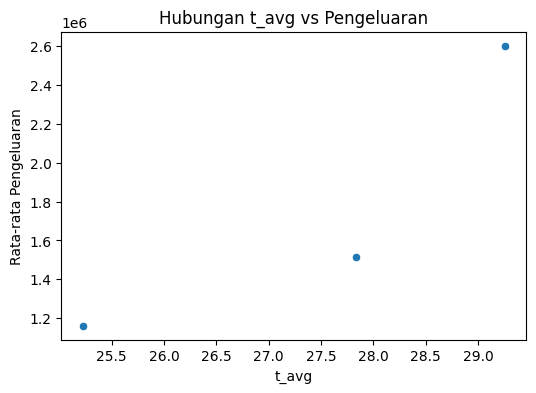

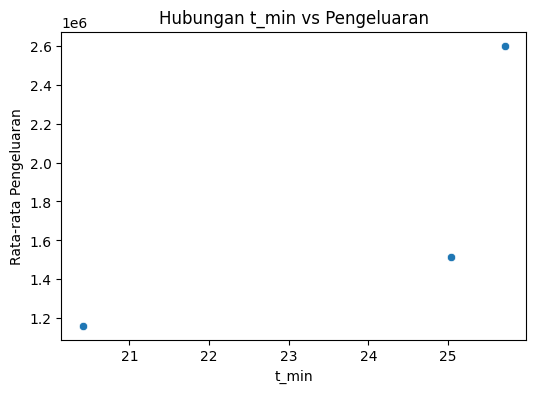

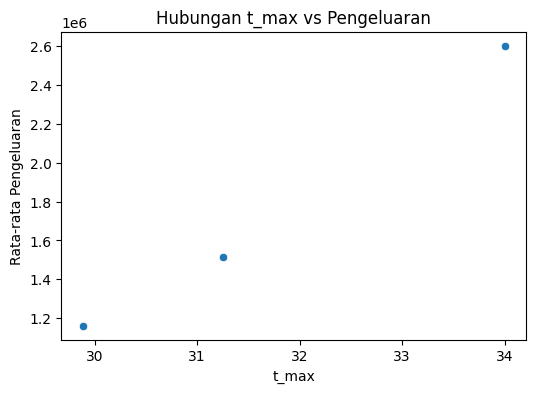

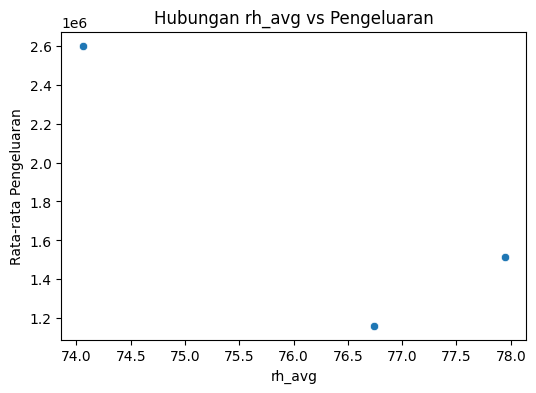

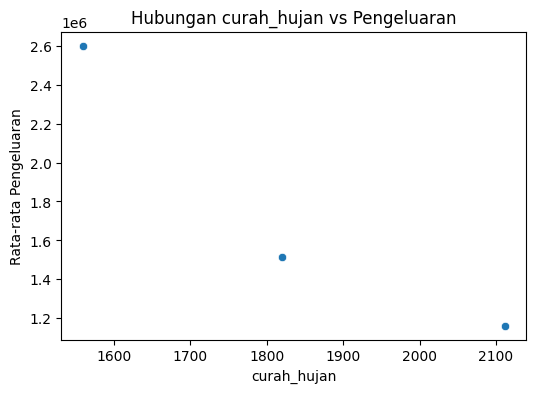

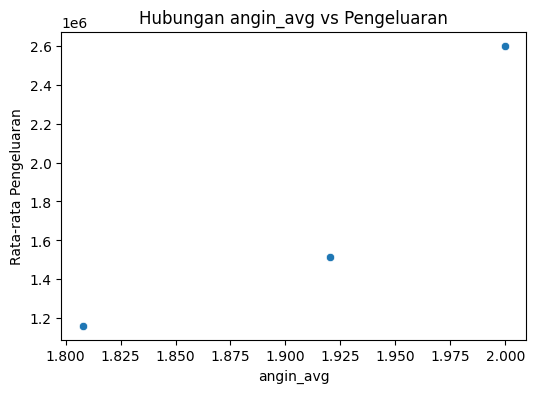

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numeric_cols = ["t_avg", "t_min", "t_max", "rh_avg", "curah_hujan", "angin_avg", "Rata-rata Pengeluaran"]

# Scatter plot setiap variabel terhadap pengeluaran
for col in numeric_cols[:-1]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_iklim_pengeluaran, x=col, y="Rata-rata Pengeluaran")
    plt.title(f"Hubungan {col} vs Pengeluaran")
    plt.show()


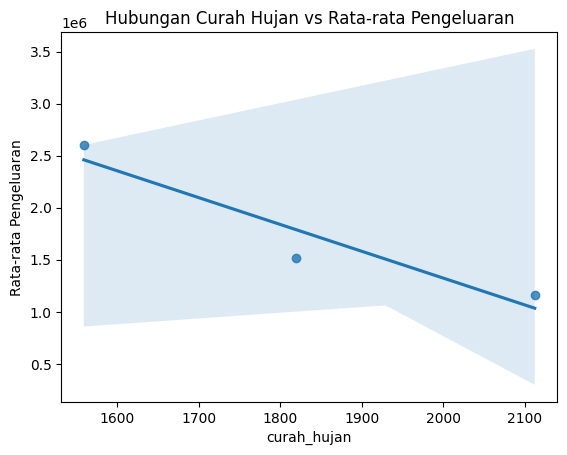

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="curah_hujan", y="Rata-rata Pengeluaran", data=df_iklim_pengeluaran)
plt.title("Hubungan Curah Hujan vs Rata-rata Pengeluaran")
plt.show()

In [ ]:
hasil = (
    df_iklim_pengeluaran.groupby("kota")
    .apply(lambda x: x["t_avg"].corr(x["Rata-rata Pengeluaran"])) # Changed 'Pengeluaran' to 'Rata-rata Pengeluaran'
    .reset_index(name="korelasi_suhu_pengeluaran")
)

hasil

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/tmp/ipython-input-2846761666.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["t_avg"].corr(x["Rata-rata Pengeluaran"])) # Changed 'Pengeluaran' to 'Rata-rata Pengeluaran'


,kota,korelasi_suhu_pengeluaran
0,BANYUWANGI,NaN
1,MALANG,NaN
2,SURABAYA,NaN


In [ ]:
for i, row in hasil.iterrows():
    kota = row["kota"]
    corr = row["korelasi_suhu_pengeluaran"]

    if corr > 0.3:
        print(f"{kota}: pengeluaran NAIK saat suhu tinggi (korelasi {corr:.2f})")
    elif corr < -0.3:
        print(f"{kota}: pengeluaran TURUN saat suhu tinggi (korelasi {corr:.2f})")
    else:
        print(f"{kota}: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi {corr:.2f})")


BANYUWANGI: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi nan)
MALANG: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi nan)
SURABAYA: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi nan)


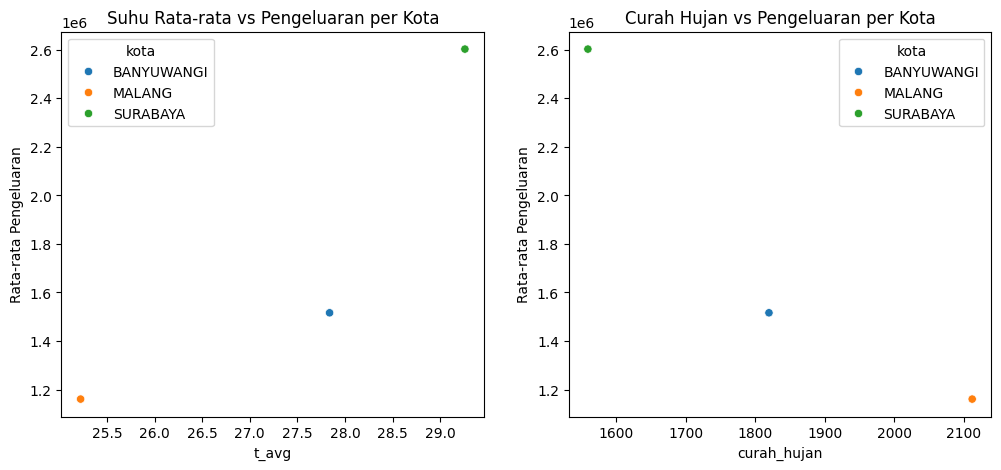

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(data=df_iklim_pengeluaran, x="t_avg", y="Rata-rata Pengeluaran", hue="kota", ax=ax[0])
ax[0].set_title("Suhu Rata-rata vs Pengeluaran per Kota")

sns.scatterplot(data=df_iklim_pengeluaran, x="curah_hujan", y="Rata-rata Pengeluaran", hue="kota", ax=ax[1])
ax[1].set_title("Curah Hujan vs Pengeluaran per Kota")

plt.show()